In [1]:
# import libraries python

# operation system
import os
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
# For Statistics
from scipy import stats
from scipy.stats import norm

# For scale continous data
from sklearn.preprocessing import StandardScaler


%matplotlib inline

import warnings

warnings.filterwarnings('ignore')


In [2]:
from scipy.stats import norm, skew

color = sns.color_palette()
sns.set_style('darkgrid')

### Processing

1. Understanding the problem
2. Learn univariable
3. Learn Multivariate 
4. Cleaning dataset: Missing data, outliers, and categorical variables
5. Test assumptions


In [57]:
# import dataset

train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422

In [7]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

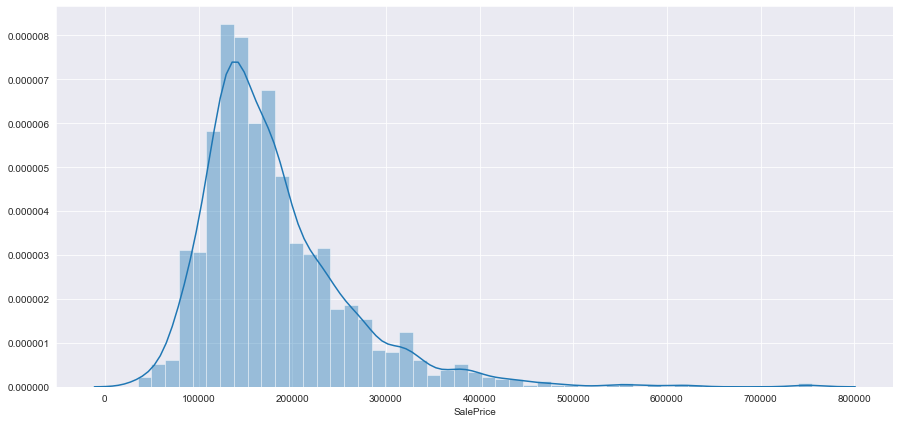

In [8]:
ax = plt.figure(figsize=(15, 7))
sns.distplot(train['SalePrice'])

In [9]:
# skewness and kurtosis

print(f"Skewness : {train['SalePrice'].skew()}")
print(f"Kurtosis: {train['SalePrice'].kurt()}")
      

Skewness : 1.8828757597682129
Kurtosis: 6.536281860064529


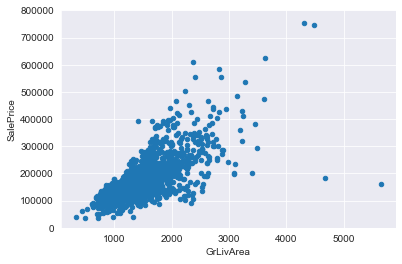

In [10]:
# Relationship with numerical variables
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
# fig, ax = plt.subplots(figsize=(15, 7))
data.plot.scatter(x="GrLivArea", y='SalePrice', ylim=(0,800000))


In [11]:
# saleprice and grlivarea with linear relationship


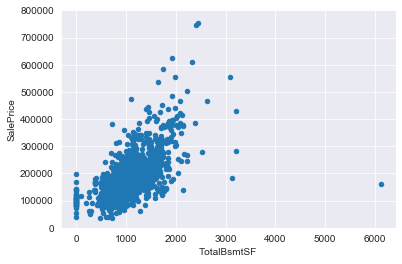

In [12]:
# totalbsmtsf/saleprice

data = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000))


In [13]:
# 2 variables are a emotional relationship, a strong linear (exponential)

In [14]:
train.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

### Relationship with categorical features

In [15]:
train['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

(-0.5, 9.5, 0, 800000)

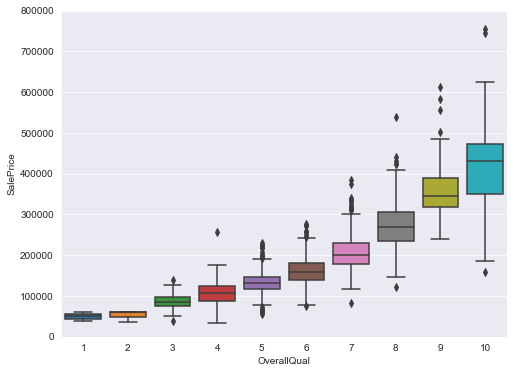

In [16]:
# overallqual / saleprice
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=train)
fig.axis(ymin=0, ymax=800000)

In [17]:
train['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

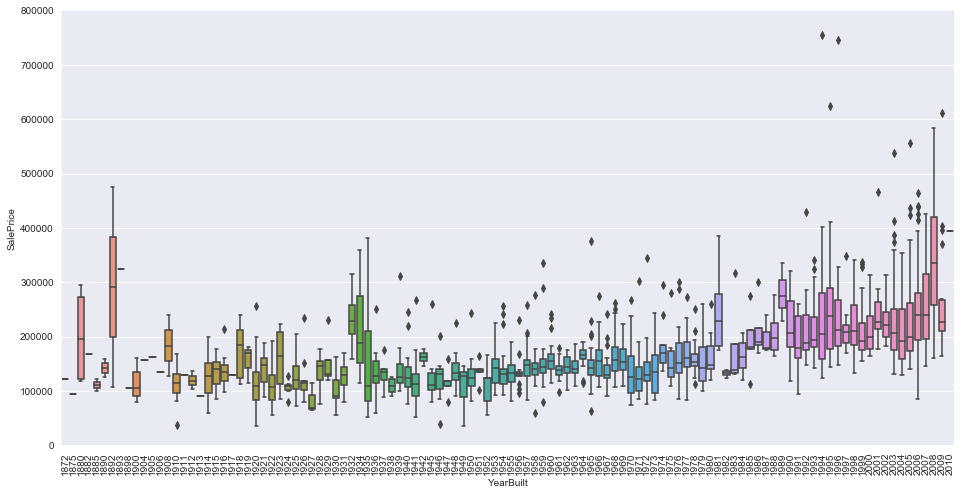

In [18]:
# yearbuild / saleprice

ax = plt.figure(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data= train)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

 ### Correlation matrix
 

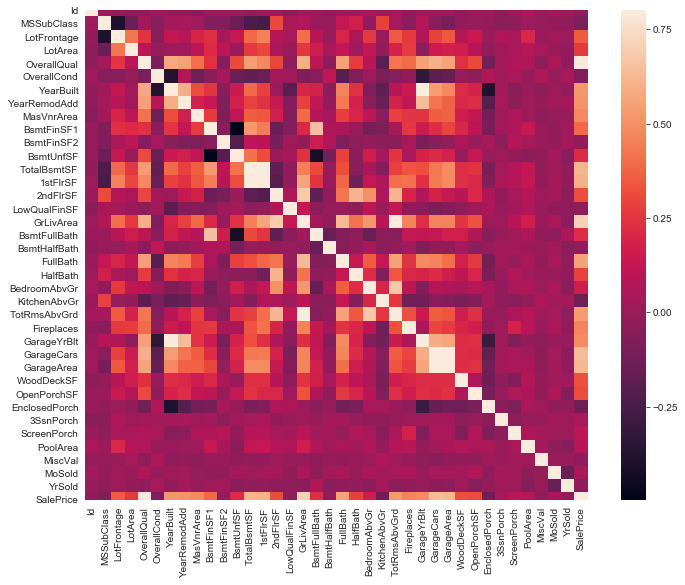

In [19]:
corr = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True)


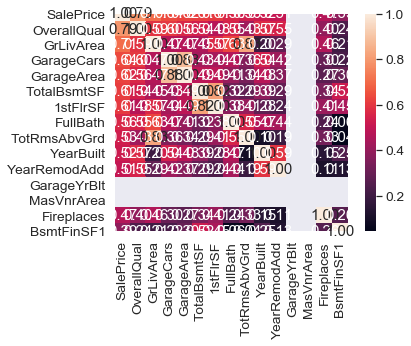

In [20]:
# saleprice correlation matrix

k = 15
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)

hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 15}, yticklabels=cols.values, 
                 xticklabels=cols.values)
plt.show()

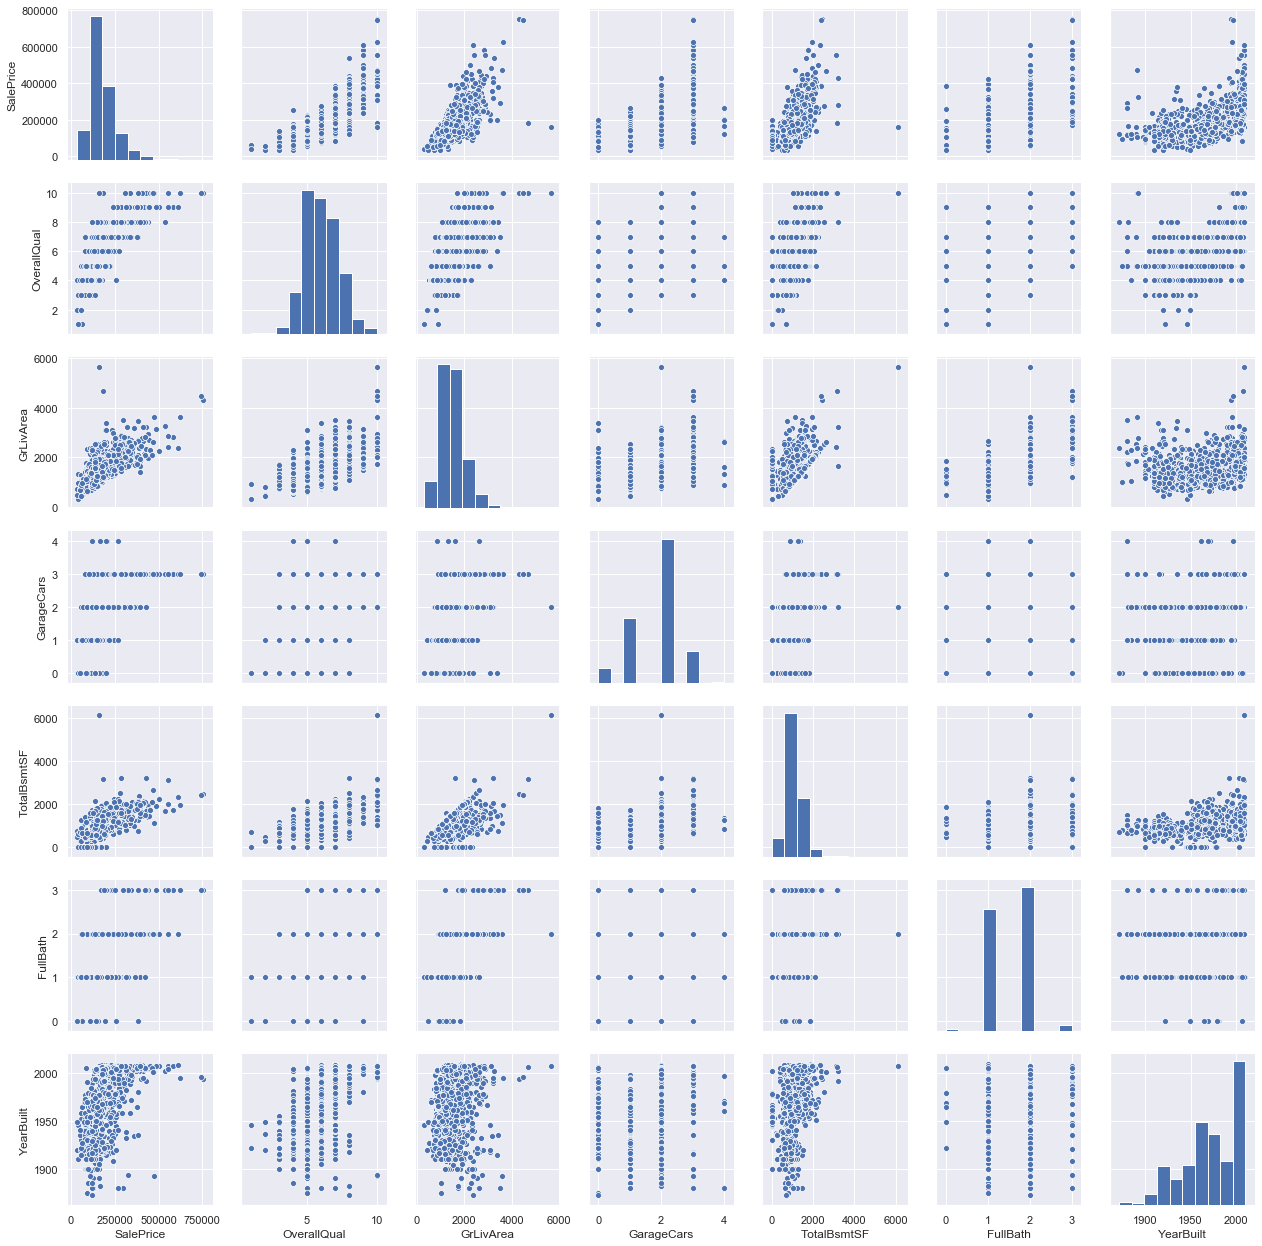

In [21]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
        'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size= 2.5)
plt.show()

### Missing data


In [22]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [23]:
# Dealing with missing data

train = train.drop((missing_data[missing_data['Total'] > 1]).index, 1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max()

0

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 63 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
ExterQual        1459 non-

### Outliers

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [25]:
#Standardizing data

st = StandardScaler()
saleprice_scaled = st.fit_transform(train['SalePrice'][:, np.newaxis])


In [26]:
len(saleprice_scaled)

1459

In [27]:
low_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10 :]

In [28]:
print('outer range (low) of the distribution:', low_range)
print('\nouter range (high) of the distribution:', high_range)

outer range (low) of the distribution: [[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution: [[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


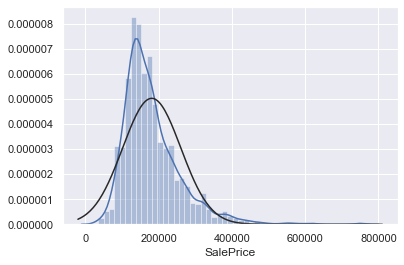

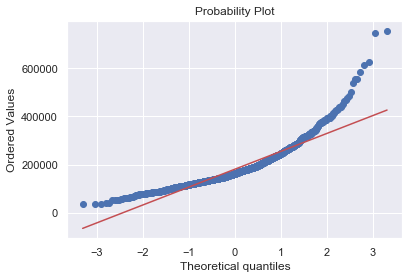

In [29]:
# histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm)

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

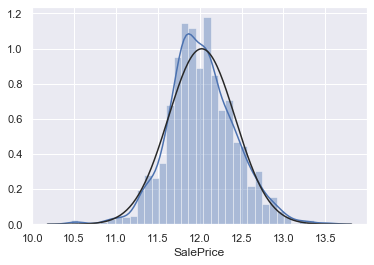

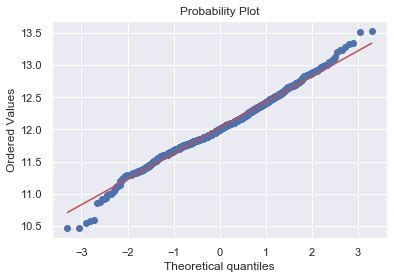

In [30]:

# applying log transformation

train['SalePrice'] = np.log(train['SalePrice'])
#transformed histogram and normal probability plot

sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

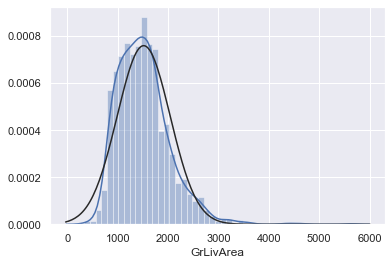

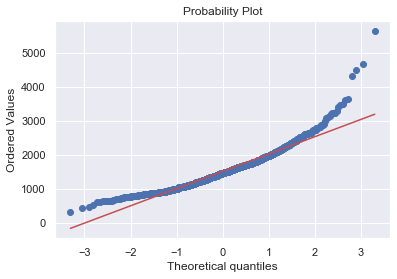

In [31]:
# histogram and normal probability plot

sns.distplot(train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

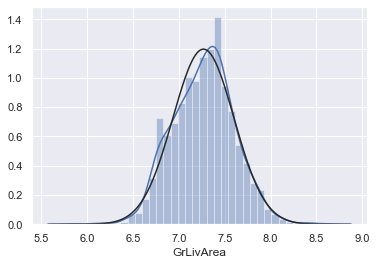

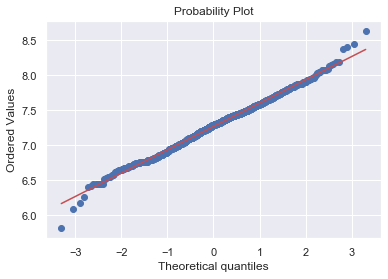

In [32]:
# data transformation
train['GrLivArea'] = np.log(train['GrLivArea'])
# transformed histogram and normal probability plot

sns.distplot(train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

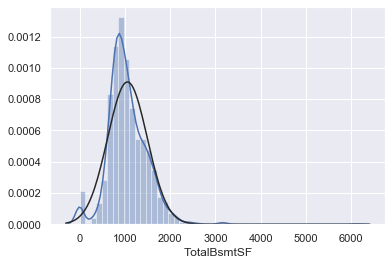

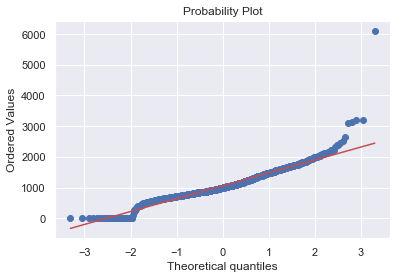

In [33]:
# histogram and normal probability plot

sns.distplot(train['TotalBsmtSF'], fit=norm)
fig = plt.figure()

res = stats.probplot(train['TotalBsmtSF'], plot=plt)


In [34]:
#creat column for new variable( one is enough because it s a binary categorical feature)

#if area >0  it gets 1, for area == 0, it get 0
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0
train.loc[train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

In [35]:
# transform data
train.loc[train['HasBsmt'] == 1, 'TotalBsmSF'] = np.log(train['TotalBsmtSF'])


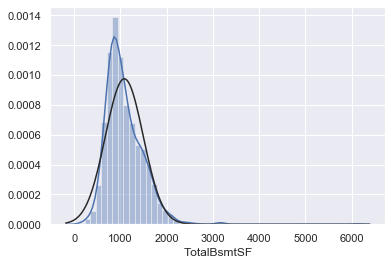

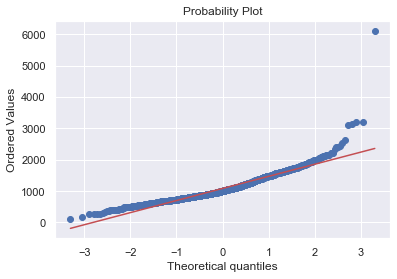

In [36]:
#histogram and normal probability plot
sns.distplot(train[train['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF'] > 0]['TotalBsmtSF'], plot=plt)

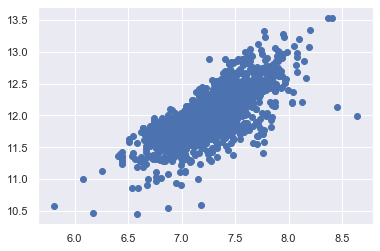

In [37]:
plt.scatter(train['GrLivArea'], train['SalePrice'])

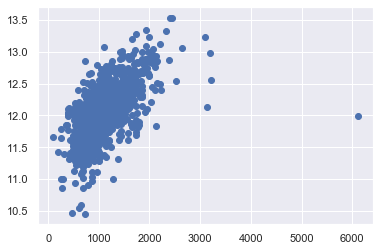

In [38]:
plt.scatter(train[train['TotalBsmtSF'] > 0]['TotalBsmtSF'],
            train[train['TotalBsmtSF'] > 0]['SalePrice'])

In [39]:

# convert categorical variable into dummy

train = pd.get_dummies(train)

In [40]:
train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [59]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

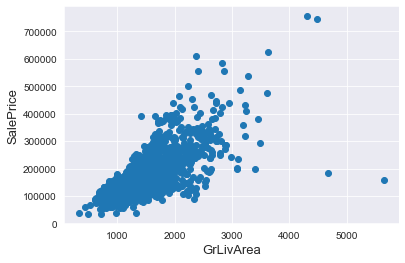

In [60]:
# outlier 
fig, ax = plt.subplots()
ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [61]:
# Deleting outliers
train = train.drop(train[(train['GrLivArea'] > 4000) & 
                         (train['SalePrice'] < 300000)].index)


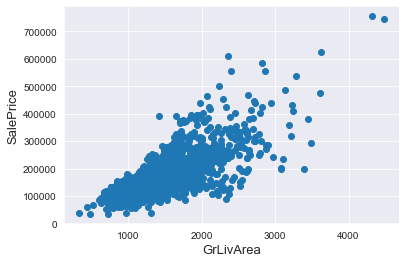

In [62]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [63]:
train['SalePrice'].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459],
           dtype='int64', length=1458)

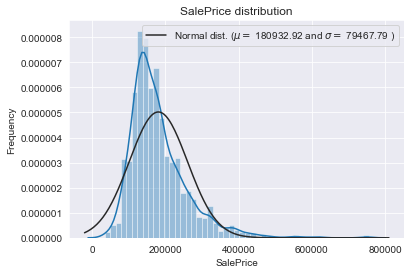

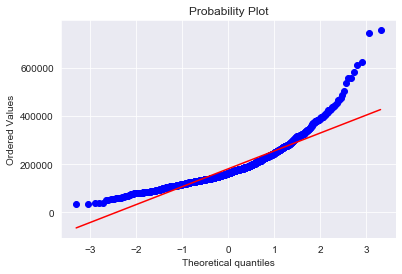

In [64]:
# Target Variable
sns.distplot(train['SalePrice'], fit=norm)

# getting the fitted parameters used by them function

mu, sigma = norm.fit(train['SalePrice'])

# Plot the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# get also the qq plot
fig = plt.figure()

res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



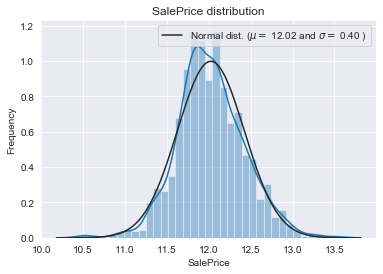

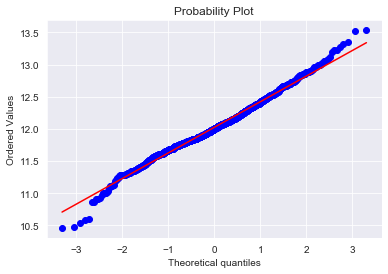

In [65]:
# the target variable is right skewed. 
# we need to transform this variable and make it more normally distributed


train['SalePrice'] = np.log1p(train['SalePrice'])
#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [66]:
ntrain = train.shape[0]
ntest = test.shape[0]


In [67]:
y_train = train['SalePrice'].values

In [68]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

print( f"all_data size is: {all_data.shape}")

all_data size is: (2917, 80)


In [70]:
all_data.drop(['Id'], axis=1, inplace=True)
all_data.shape

KeyError: "['Id'] not found in axis"

In [71]:
# missing data
total = all_data.isnull().sum()
all_data_na = (total / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]



In [72]:
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

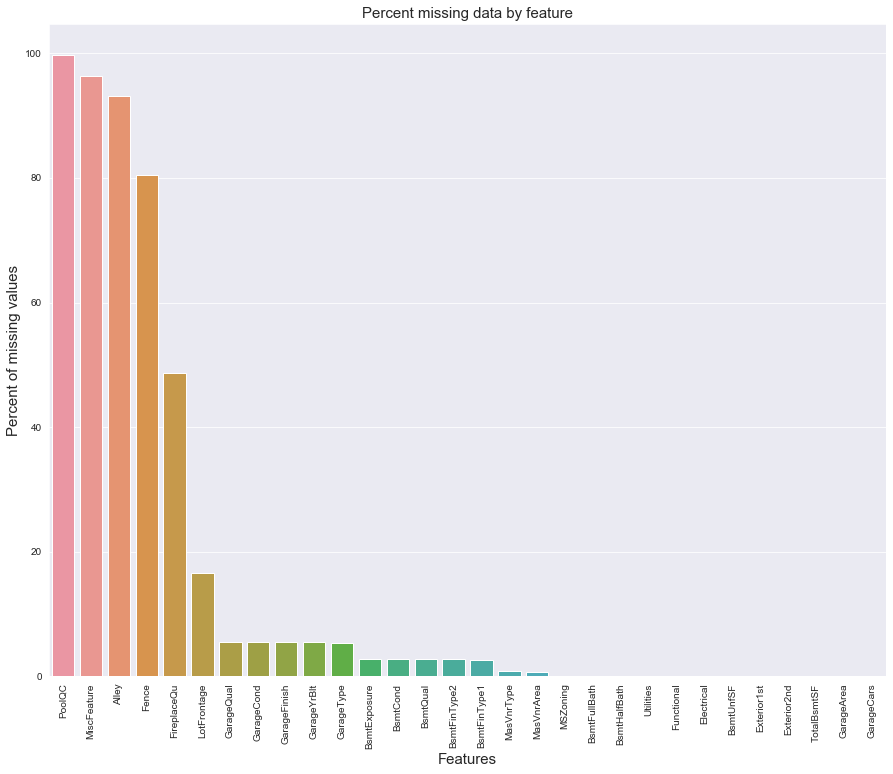

In [73]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

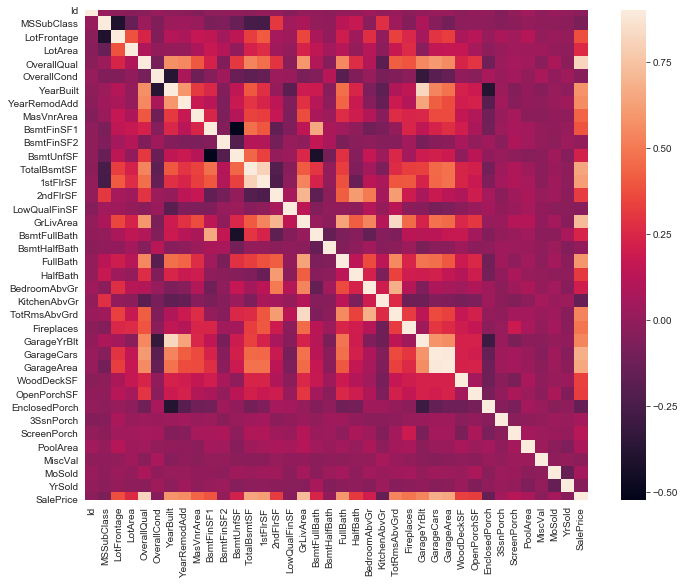

In [74]:
# Data COrrelation

corr = train.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=0.9, square=True)

In [75]:
all_data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
2913,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
2914,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
2915,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,...,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


In [76]:
# Impute missing values
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')
all_data['Alley'] = all_data['Alley'].fillna('None')
all_data['Fence'] = all_data['Fence'].fillna('None')
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

# Group by neighborhood and fill in missing value by the median  Lot Frontage of all the neighborhood
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    
    all_data[col] = all_data[col].fillna('None')
    

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
    
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
            'BsmtFullBath', 'BsmtHalfBath']:
    all_data[col] = all_data[col].fillna(0)
    
    
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    all_data[col] = all_data[col].fillna('None')
    
    
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)


all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

all_data = all_data.drop(['Utilities'], axis=1)

all_data['Functional'] = all_data['Functional'].fillna('Typ')
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['MSSubClass'] = all_data['MSSubClass'].fillna('None')

all_data.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,Normal,WD,0,Pave,8,856.0,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,Normal,WD,0,Pave,6,1262.0,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,Normal,WD,0,Pave,6,920.0,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,Abnorml,WD,0,Pave,7,756.0,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,Normal,WD,0,Pave,9,1145.0,192,2000,2000,2008
5,796,566,320,None,1,1Fam,TA,No,732.0,0.0,...,Normal,WD,0,Pave,5,796.0,40,1993,1995,2009
6,1694,0,0,None,3,1Fam,TA,Av,1369.0,0.0,...,Normal,WD,0,Pave,7,1686.0,255,2004,2005,2007
7,1107,983,0,None,3,1Fam,TA,Mn,859.0,32.0,...,Normal,WD,0,Pave,7,1107.0,235,1973,1973,2009
8,1022,752,0,None,2,1Fam,TA,No,0.0,0.0,...,Abnorml,WD,0,Pave,8,952.0,90,1931,1950,2008
9,1077,0,0,None,2,2fmCon,TA,No,851.0,0.0,...,Normal,WD,0,Pave,5,991.0,0,1939,1950,2008


In [24]:
# all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
# all_data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,Normal,WD,0,Pave,8,856.0,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,Normal,WD,0,Pave,6,1262.0,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,Normal,WD,0,Pave,6,920.0,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,Abnorml,WD,0,Pave,7,756.0,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,Normal,WD,0,Pave,9,1145.0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,546,546,0,None,3,Twnhs,TA,No,0.0,0.0,...,Normal,WD,0,Pave,5,546.0,0,1970,1970,2006
2913,546,546,0,None,3,TwnhsE,TA,No,252.0,0.0,...,Abnorml,WD,0,Pave,6,546.0,0,1970,1970,2006
2914,1224,0,0,None,4,1Fam,TA,No,1224.0,0.0,...,Abnorml,WD,0,Pave,7,1224.0,474,1960,1996,2006
2915,970,0,0,None,3,1Fam,TA,Av,337.0,0.0,...,Normal,WD,0,Pave,6,912.0,80,1992,1992,2006


In [77]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [78]:
all_data.isna().sum()

1stFlrSF        0
2ndFlrSF        0
3SsnPorch       0
Alley           0
BedroomAbvGr    0
               ..
TotalBsmtSF     0
WoodDeckSF      0
YearBuilt       0
YearRemodAdd    0
YrSold          0
Length: 78, dtype: int64

In [79]:
all_data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,Normal,WD,0,Pave,8,856.0,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,Normal,WD,0,Pave,6,1262.0,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,Normal,WD,0,Pave,6,920.0,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,Abnorml,WD,0,Pave,7,756.0,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,Normal,WD,0,Pave,9,1145.0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,546,546,0,None,3,Twnhs,TA,No,0.0,0.0,...,Normal,WD,0,Pave,5,546.0,0,1970,1970,2006
2913,546,546,0,None,3,TwnhsE,TA,No,252.0,0.0,...,Abnorml,WD,0,Pave,6,546.0,0,1970,1970,2006
2914,1224,0,0,None,4,1Fam,TA,No,1224.0,0.0,...,Abnorml,WD,0,Pave,7,1224.0,474,1960,1996,2006
2915,970,0,0,None,3,1Fam,TA,Av,337.0,0.0,...,Normal,WD,0,Pave,6,912.0,80,1992,1992,2006


In [80]:
all_data.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 42 columns):
Alley            2917 non-null object
BldgType         2917 non-null object
BsmtCond         2917 non-null object
BsmtExposure     2917 non-null object
BsmtFinType1     2917 non-null object
BsmtFinType2     2917 non-null object
BsmtQual         2917 non-null object
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      2917 non-null object
Exterior2nd      2917 non-null object
Fence            2917 non-null object
FireplaceQu      2917 non-null object
Foundation       2917 non-null object
Functional       2917 non-null object
GarageCond       2917 non-null object
GarageFinish     2917 non-null object
GarageQual       2917 non-null object
GarageType       2917 non-null object
Heating          29

In [81]:
# transforming soem numerical variables that are really categorical

all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)



In [82]:
all_data.select_dtypes('object').columns

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'MoSold', 'Neighborhood', 'OverallCond', 'PavedDrive', 'PoolQC',
       'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street',
       'YrSold'],
      dtype='object')

In [83]:
cols = list(all_data.select_dtypes('object').columns)
cols

['Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSSubClass',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'MoSold',
 'Neighborhood',
 'OverallCond',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'YrSold']

In [41]:
all_data['PoolQC'].values

array(['None', 'None', 'None', ..., 'None', 'None', 'None'], dtype=object)

In [84]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lb = LabelEncoder()
    lb.fit(list(all_data[c].values))
    all_data[c] = lb.transform(list(all_data[c].values))
    
    

In [85]:
print(f"Shape all_data : {all_data.shape}")

Shape all_data : (2917, 78)


In [44]:
all_data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,1,3,0,4,3,706.0,0.0,...,4,8,0,1,8,856.0,0,2003,2003,2
1,1262,0,0,1,3,0,4,1,978.0,0.0,...,4,8,0,1,6,1262.0,298,1976,1976,1
2,920,866,0,1,3,0,4,2,486.0,0.0,...,4,8,0,1,6,920.0,0,2001,2002,2
3,961,756,0,1,3,0,1,3,216.0,0.0,...,0,8,0,1,7,756.0,0,1915,1970,0
4,1145,1053,0,1,4,0,4,0,655.0,0.0,...,4,8,0,1,9,1145.0,192,2000,2000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,546,546,0,1,3,3,4,3,0.0,0.0,...,4,8,0,1,5,546.0,0,1970,1970,0
2913,546,546,0,1,3,4,4,3,252.0,0.0,...,0,8,0,1,6,546.0,0,1970,1970,0
2914,1224,0,0,1,4,0,4,3,1224.0,0.0,...,0,8,0,1,7,1224.0,474,1960,1996,0
2915,970,0,0,1,3,0,4,0,337.0,0.0,...,4,8,0,1,6,912.0,80,1992,1992,0


In [86]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']


In [96]:
all_data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF
0,11.692623,11.686189,0.0,0.730463,1.540963,0.000000,1.820334,1.540963,11.170327,0.0,...,2.602594,0.0,0.730463,2.602594,11.692623,0.000000,14.187527,14.187527,1.194318,14.976591
1,12.792276,0.000000,0.0,0.730463,1.540963,0.000000,1.820334,0.730463,12.062832,0.0,...,2.602594,0.0,0.730463,2.259674,12.792276,9.010206,14.145138,14.145138,0.730463,14.923100
2,11.892039,11.724598,0.0,0.730463,1.540963,0.000000,1.820334,1.194318,10.200343,0.0,...,2.602594,0.0,0.730463,2.259674,11.892039,0.000000,14.184404,14.185966,1.194318,15.149678
3,12.013683,11.354094,0.0,0.730463,1.540963,0.000000,0.730463,1.540963,8.274266,0.0,...,2.602594,0.0,0.730463,2.440268,11.354094,0.000000,14.047529,14.135652,0.000000,14.857121
4,12.510588,12.271365,0.0,0.730463,1.820334,0.000000,1.820334,0.000000,10.971129,0.0,...,2.602594,0.0,0.730463,2.750250,12.510588,8.013884,14.182841,14.182841,1.194318,15.852312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,10.496872,10.496872,0.0,0.730463,1.540963,1.540963,1.820334,1.540963,0.000000,0.0,...,2.602594,0.0,0.730463,2.055642,10.496872,0.000000,14.135652,14.135652,0.000000,13.567978
2913,10.496872,10.496872,0.0,0.730463,1.540963,1.820334,1.820334,1.540963,8.622254,0.0,...,2.602594,0.0,0.730463,2.259674,10.496872,0.000000,14.135652,14.135652,0.000000,13.567978
2914,12.703313,0.000000,0.0,0.730463,1.820334,0.000000,1.820334,1.540963,12.703313,0.0,...,2.602594,0.0,0.730463,2.440268,12.703313,10.137338,14.119786,14.176584,0.000000,14.824355
2915,12.039794,0.000000,0.0,0.730463,1.540963,0.000000,1.820334,0.000000,9.301176,0.0,...,2.602594,0.0,0.730463,2.259674,11.867769,6.221214,14.170316,14.170316,0.000000,13.993617


In [88]:
all_data.dtypes.index

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [95]:
# Skewed features

numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
numeric_feats

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [90]:
# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

print('\nSkew in numerical features: \n')
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
Condition2,12.340989
LowQualFinSF,12.084539
Heating,12.074570
3SsnPorch,11.372080
RoofMatl,8.722755
MiscFeature,5.062388
LandSlope,4.973254


In [91]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
    

There are 79 skewed numerical features to Box Cox transform


In [92]:
# getting dummy categorical features

all_data.shape

(2917, 79)

In [93]:
all_data = pd.get_dummies(all_data)


In [94]:
all_data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF
0,11.692623,11.686189,0.0,0.730463,1.540963,0.000000,1.820334,1.540963,11.170327,0.0,...,2.602594,0.0,0.730463,2.602594,11.692623,0.000000,14.187527,14.187527,1.194318,14.976591
1,12.792276,0.000000,0.0,0.730463,1.540963,0.000000,1.820334,0.730463,12.062832,0.0,...,2.602594,0.0,0.730463,2.259674,12.792276,9.010206,14.145138,14.145138,0.730463,14.923100
2,11.892039,11.724598,0.0,0.730463,1.540963,0.000000,1.820334,1.194318,10.200343,0.0,...,2.602594,0.0,0.730463,2.259674,11.892039,0.000000,14.184404,14.185966,1.194318,15.149678
3,12.013683,11.354094,0.0,0.730463,1.540963,0.000000,0.730463,1.540963,8.274266,0.0,...,2.602594,0.0,0.730463,2.440268,11.354094,0.000000,14.047529,14.135652,0.000000,14.857121
4,12.510588,12.271365,0.0,0.730463,1.820334,0.000000,1.820334,0.000000,10.971129,0.0,...,2.602594,0.0,0.730463,2.750250,12.510588,8.013884,14.182841,14.182841,1.194318,15.852312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,10.496872,10.496872,0.0,0.730463,1.540963,1.540963,1.820334,1.540963,0.000000,0.0,...,2.602594,0.0,0.730463,2.055642,10.496872,0.000000,14.135652,14.135652,0.000000,13.567978
2913,10.496872,10.496872,0.0,0.730463,1.540963,1.820334,1.820334,1.540963,8.622254,0.0,...,2.602594,0.0,0.730463,2.259674,10.496872,0.000000,14.135652,14.135652,0.000000,13.567978
2914,12.703313,0.000000,0.0,0.730463,1.820334,0.000000,1.820334,1.540963,12.703313,0.0,...,2.602594,0.0,0.730463,2.440268,12.703313,10.137338,14.119786,14.176584,0.000000,14.824355
2915,12.039794,0.000000,0.0,0.730463,1.540963,0.000000,1.820334,0.000000,9.301176,0.0,...,2.602594,0.0,0.730463,2.259674,11.867769,6.221214,14.170316,14.170316,0.000000,13.993617


In [102]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [103]:
# cross_val_score has not a shuffle atribute

# Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
    return rmse
    

In [105]:
# base model
# Lasso Regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.005, random_state=1))

#Elastic net Pregression
Enet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3))

# Kernel Ridge Regression

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)


# Gradient Boosting Regression
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state=5)


#XGBoost

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1, random_state=7, nthread=-1)

# LightBM

model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                              learning_rate=0.05, n_estimators=720, 
                              max_bin=55, bagging_fraction=0.8, 
                              bagging_freq=5, feature_fraction=0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf=6, min_sum_hessian_in_leaf=11)

In [107]:
score = rmsle_cv(lasso)
score.mean()

ValueError: could not convert string to float: 'RL'